INFO:tensorflow:Restoring parameters from e:/flowers/modle.ckpt
预测结果: [1 2 3 4 0 2 0 4 3]


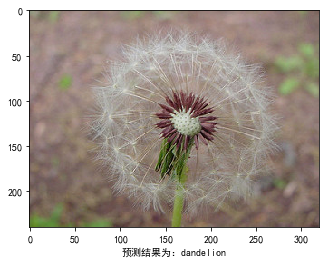

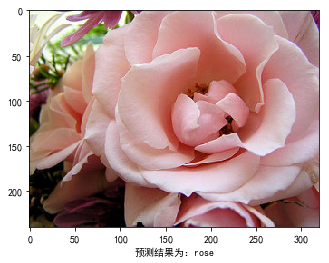

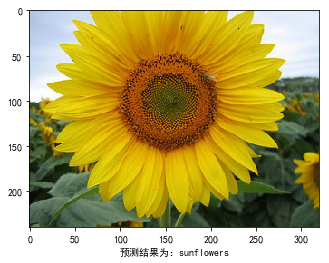

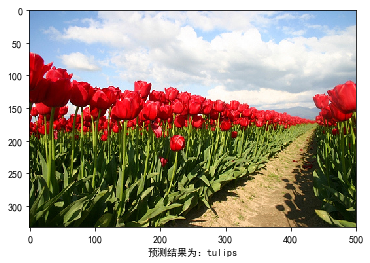

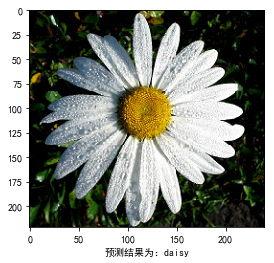

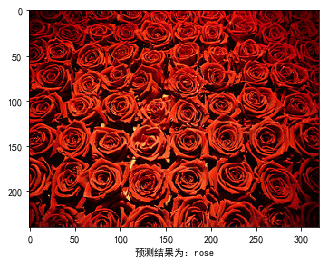

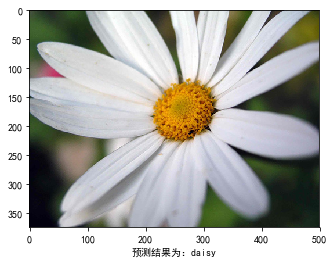

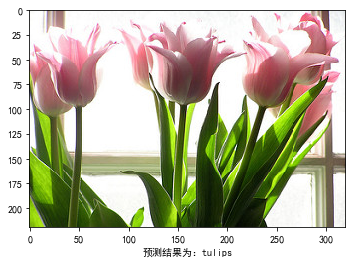

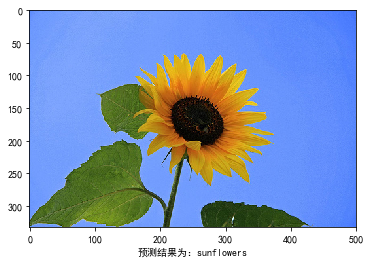

In [44]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from skimage import io,transform

#读取图片
def read_img(path):
    #os.listdir(path)表示在path路径下的所有文件和和文件夹列表
    #用cate记录五种花的文件路径
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]
    imgs=[]  #存放所有的图片
    labels=[]  #图片的类别标签
    for idx,folder in enumerate(cate):
        for im in glob.glob(folder+'/*.jpg'):
            #print('reading the images:%s'%(im))#im表示某张图片的路径
            img=io.imread(im)
            img=transform.resize(img,(w,h))#图片resize为100*100
            imgs.append(img)
            labels.append(idx)
    #不用array的原因是copy时不会占用新的内存
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32)  

def predict(img):
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph('E:/flowers/modle.ckpt.meta')
        saver.restore(sess,tf.train.latest_checkpoint('E:/flowers/'))
        graph = tf.get_default_graph()
        x = graph.get_tensor_by_name("x:0")
        feed_dict = {x:img}
        logits = graph.get_tensor_by_name("logits_eval:0")
        #得到预测结果
        classification_result = sess.run(logits,feed_dict)
        output = tf.argmax(classification_result,1).eval()
        return output
imgs = []
for i in range(1,10):
    img = io.imread('e:/test/'+str(i)+'.jpg')
    img = transform.resize(img,(100,100))
    imgs.append(img)
imgs = np.asarray(imgs,np.float32)
output = predict(imgs)
#acc = test(x_test,y_test)
class_flower = ["daisy","dandelion","rose","sunflowers","tulips"]
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
print('预测结果:',output)
for i in range(9):
    plt.figure(i+1)
    img = io.imread('e:/test/'+str(i+1)+'.jpg')
    plt.imshow(img)
    plt.xlabel('预测结果为：'+class_flower[output[i]])